In [2]:
!pip install shap

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
 
import matplotlib.pyplot as plt
%matplotlib inline
!pip install imbalanced-learn

import pandas as pd
import numpy as np
df = pd.read_csv(r'mordred2dinputfinal.csv')
df.shape

X = df.drop("class", axis=1)
Y = df["class"]
df.head(10)
df=df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df=df.replace(np.nan, 0)
X = df.drop("class", axis=1)
y = df["class"]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#Spliting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

from imblearn.combine import SMOTEENN
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train,y_train)
X_test_smenn, y_test_smenn = smenn.fit_resample(X_test,y_test)
counter = Counter(y_train_smenn)
print('After',counter)

C:\Users\91830\AppData\Local\Temp\ipykernel_15124\3848797984.py:21: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,53,54,55,56,57,58,59,60,61,141,142,150,151,152,153,154,155,156,157,158,168,169,177,178,186,187,195,196,204,205,213,214,222,223,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,267,268,341,342,343,344,345,346,347,348,349,357,358,366,367,368,369,370,371,372,373,374,384,385,393,394,402,403,411,412,420,421,429,430,438,439,447,448,449,450,451,452,453,454,455,456,463,464,471,472,473,474,475,476,477,478,487,488,495,496,503,504,511,512,519,520,527,528,535,536,543,544,545,546,547,548,549,550,551,552,559,560,567,568,569,570,571,572,573,574,583,584,591,592,599,600,607,608,615,616,623,624,631,632,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,

Before Counter({0: 1004, 1: 388})
After Counter({1: 822, 0: 525})



Accuracy:  0.921591174865518

MCC: 0.8457245972498455

Sensitivity:  0.9455445544554455

Specificity:  0.8976377952755905

Recall:  0.9455445544554455

Precision:  0.9362745098039216

Area under the ROC curve:  0.921591174865518

F1 score:  0.9408866995073891


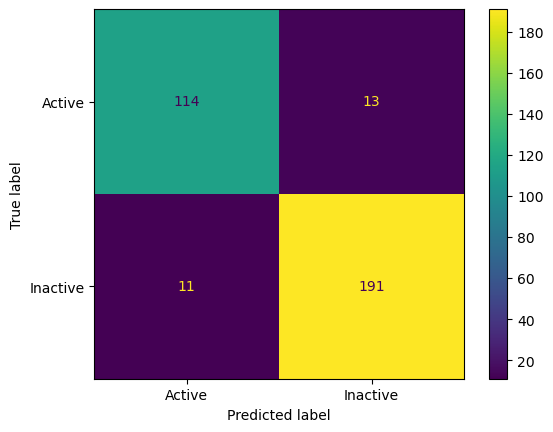

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier
#XGBoost classifer 

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=500)
xgb_model.fit(X_train_smenn, y_train_smenn)

y_predxgb = xgb_model.predict(X_test_smenn)

#Model Evaluation
tn, fp, fn, tp = confusion_matrix(y_test_smenn, y_predxgb).ravel()
MCC = matthews_corrcoef(y_test_smenn, y_predxgb)
accuracy = balanced_accuracy_score(y_test_smenn, y_predxgb)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = recall_score(y_test_smenn, y_predxgb)
precision = precision_score(y_test_smenn, y_predxgb)
roc_auc = roc_auc_score(y_test_smenn, y_predxgb)
f1 = f1_score(y_test_smenn, y_predxgb)
print('\nAccuracy: ', accuracy)
print('\nMCC:', MCC)
print('\nSensitivity: ', sensitivity)
print('\nSpecificity: ', specificity)
print('\nRecall: ', recall)
print('\nPrecision: ', precision)
print('\nArea under the ROC curve: ', roc_auc)
print('\nF1 score: ', f1)
#confusion matrix
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_smenn, y_predxgb)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Inactive'])
cmd.plot()

In [7]:
import shap
# Fits the explainer
explainer = shap.Explainer(xgb_model.predict, X_test_smenn, max_evals = 3000)
# Evaluate SHAP values
shap_values = explainer(X_test_smenn)

Permutation explainer: 330it [23:37,  4.32s/it]                                                                        


In [8]:
!pip install pluggy

In [9]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X_test_smenn)

AttributeError: module 'warnings' has no attribute 'DeprecationWarning'

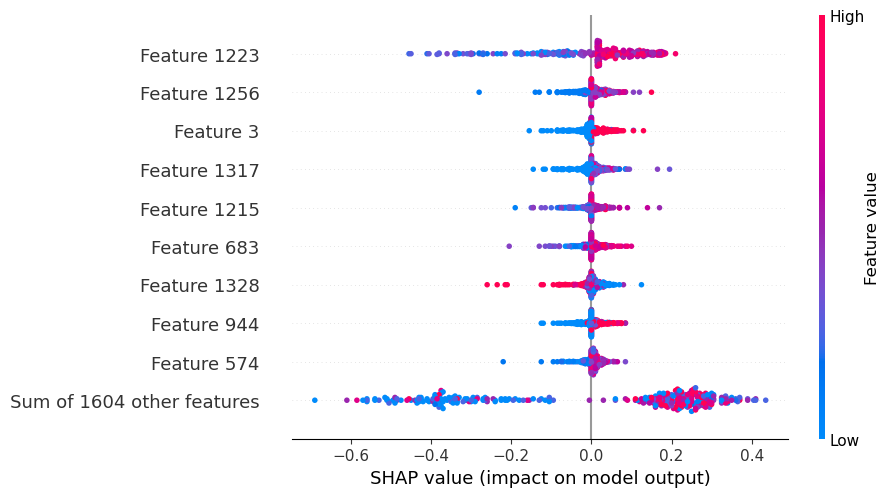

In [10]:
shap.plots.beeswarm(shap_values)